# Keras alapok, Jupyter demo

Ebben a munkafüzetben fogunk megismerkedni a Keras framework alapvető tulajdonságaival. A feldolgozáshoz célszerű cellánként haladni, futtatni, esetleg módosítani a kódot.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

1000 darab tanítómintát generálunk, amelyek esetén két leíró tulajdonság alapján szeretnénk majd a klasszifikációt elvégezni. A mintákat $X$, $1000 \times 2$ mátrixba fogjuk majd tárolni. A mintákhoz tartozó címkék $Y$, $1000 \times 1$ mátrixba kerülnek.

In [3]:
X = np.zeros((1000, 2))
Y = np.zeros((1000, 1))

Adatok begyűjtésénél fontos szempont hogy minden elérhető típusból ugyanannyi darabbal rendelkezzünk: mi most bináris klasszifikációhoz generálunk adatokat, így az ideális eset ha az összesen $1000$ mintából $500$ az egyik, $500$ a másik osztályba sorolt.

Ennélfogva a generálás is működhet úgy, hogy minden páros elem $0$, minden páratlan elem pedig $1$ címkét kap.

In [4]:
for i in range(1000):
    if i % 2 == 0:
        val = random.uniform(0, 1.0)
        X[i, :] = [val, random.uniform(val, 1.0)]
    else:
        val = random.uniform(0, 1.0)
        X[i, :] = [val, random.uniform(0.0, val)]
        Y[i] = 1

Rajzoljuk ki az értékeket! A Jupyter notebook nagy előnye hogy a plotok itt a webes felületen jelennek meg.
A _scatter_ plot egy olyan diagramot jelenít meg, amelyen az egyes $x \in X$ elemek úgy vannak elhelyezve, hogy a vízszintes tengelyen $x[0]$, a függőleges tengelyen pedig $x[1]$ érték van figyelembevéve.

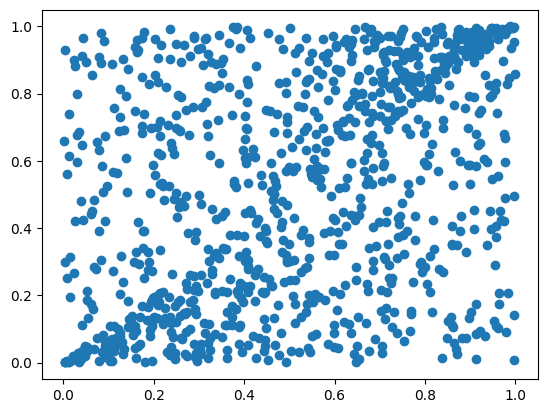

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Ez persze így nem barátságos, hisz minden elemnek ugyanaz a színe. A *.scatter()* metódusnak átadható egy $c$ attribútum, amely a színi információt hordozza az egyes elemekhez RGB formátumban.
Ehhez $Y$-t át kell alakítani $1000 \times 1$ alakról $1000 \times 3$ alakúra úgy, hogy az egyes értékekhez RGB színek tartozzanak.

A vektorok felépítése $[R, G, B]$, ahol $R$, $G$ és $B$ jelenti a három főkomponenst, amelyek értéke $[0; 1]$ tartományon adott.

Az alábbi példát úgy dolgoztam ki, hogy az egyes $y \in Y$ elemekre $y = 0$ esetén zöld legyen az érték (azaz $[0, 1, 0]$ vektorra képezze le az értékeket), míg $y = 1$ esetén kék legyen ($[0, 0, 1]$).

List comprehension:

In [6]:
[[0, 1-Y[i, 0], Y[i, 0]] for i in range(1000)]

[[0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0, 0.0],
 [0, 0.0, 1.0],
 [0, 1.0

Ez alapján a plot rögtön színesebb lesz:

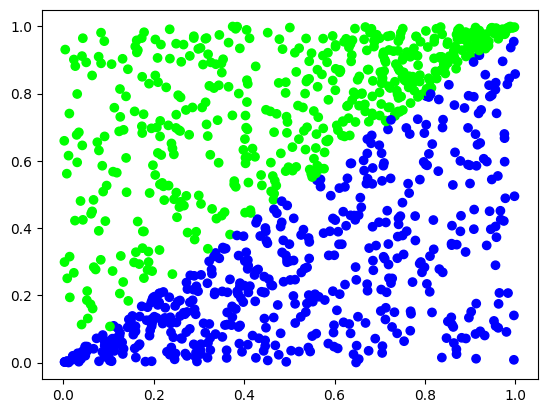

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=[[0, 1-Y[i, 0], Y[i, 0]] for i in range(1000)])
plt.show()

A korábban tanultaknak megfelelően az adathalmazunkat két részre bontjuk: tanító és validációs halmazra. $1000$ mintából legyen $900$ tanítóminta és a maradék $100$ validációs minta.

Mivel a minták generálásakor ügyeltünk a kiegyensúlyozottságra - azaz minden páros sorszámú minta $0$, minden páratlan sorszámú pedig $1$, a gyakorlatban szétvágás után is marad a kiegyensúlyozottság.

In [8]:
split = int(X.shape[0] * 0.9)

train_X, valid_X = X[:split, :], X[split:, :]
train_Y, valid_Y = Y[:split, :], Y[split:, :]

A biztonság kedvéért azért nézzük meg hogy néz ki a validációs halmaz:
*(Ez a kód teljesen ugyanaz mint fentebb volt, csak most $valid\_X$ és $valid\_Y$ szerint)*

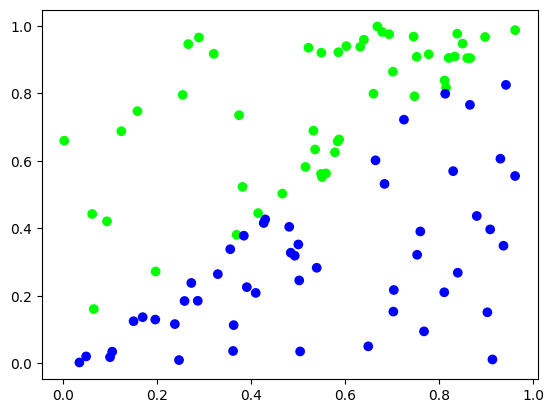

In [9]:
plt.scatter(valid_X[:, 0], valid_X[:, 1], c=[[0, 1-valid_Y[i, 0], valid_Y[i, 0]] for i in range(valid_X.shape[0])])
plt.show()

Alkossunk egy egyszerű hálózatot a klasszifikációra: az egyes rétegekben a neuronok száma legyen
$2 \rightarrow 3 \rightarrow 1$,
a kimeneti réteg *sigmoid* aktivációjú legyen, a többi rétegben ez legyen *ReLU*. A *kernel_initializer* és a *bias_initializer* a tanítható paraméterek kezdőértékének generálási módját adja meg: https://keras.io/initializers/

Az optimizer legyen *Adam*, vagy *SGD* vagy *RMSProp*: https://keras.io/optimizers/

In [10]:
from keras import Sequential
from keras.callbacks import Callback
from keras.layers import Dense

input_params = train_X.shape[1]

model = Sequential()
model.add(Dense(input_params, input_shape=(input_params, ), activation='relu', 
                kernel_initializer='random_uniform',bias_initializer='zeros'))
model.add(Dense(3, activation='relu', kernel_initializer='random_uniform',
                bias_initializer='zeros'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform',
                bias_initializer='zeros'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Tanítsuk a modellt, először csak $10$ epochon keresztül. Ha a *validation_data* paraméternek értéket adunk, akkor minden epoch végén végez egy validációs vizsgálatot is, így folyamatosan láthatjuk hogy hogy tanul a modell.

In [11]:
model.fit(train_X, train_Y, epochs=10,
          validation_data=(valid_X, valid_Y))

Epoch 1/10
29/29 [==============================] - 2s 16ms/step - loss: 0.6932 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
29/29 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
29/29 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4711 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
29/29 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
29/29 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
29/29 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
29/29 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
29/29 [=

Érezzük, hogy ez rengeteg szükségtelen infó kiírását jelenti, főleg ha a nagyobb hatásfok eléréséhez jóval nagyobb epochszámban fogjuk végezni a tanítást. A *.fit()* függvény paraméterei között a *verbose* átállításával letiltható a kimenet.

Ahhoz hogy időnként azért kapjunk visszajelzést, definiálhatunk egy callbacket: ez így ebben a formájában minden epoch végén meghívódik, és $100$ epochonként kiírja a *logs* tartalmát - ebben benne van a tanítómintákra és validációs halmazra számolt loss és accuracy.

In [12]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:
            print(epoch + 1, logs)

In [13]:
model.fit(train_X, train_Y, epochs=300,
          batch_size = 500,
          verbose = 0,  #default: 1
          callbacks=[MyCallback()],
          validation_data=(valid_X, valid_Y))

1 {'loss': 0.6931504607200623, 'accuracy': 0.5, 'val_loss': 0.6931500434875488, 'val_accuracy': 0.5}
101 {'loss': 0.6931502223014832, 'accuracy': 0.5, 'val_loss': 0.6931490302085876, 'val_accuracy': 0.5}
201 {'loss': 0.6931480765342712, 'accuracy': 0.5, 'val_loss': 0.6931478381156921, 'val_accuracy': 0.5}


A *batch_size* alapesetben 32, ez a tanítás gyorsítása érdekében növelhető. Mivel relatíve kevés a minta, akár maximális érték is adható neki ($1000$).

Tanítás után próbálkozzunk meg felmérni a modell teljesítményét! Első körben nézzük meg, milyen válaszokat ad a validációs halmaz adataira.

In [14]:
model.predict(valid_X)

4/4 [==============================] - 0s 2ms/step


array([[0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],
       [0.4997491],


A predikció eredménye $[0; 1]$ közötti valós érték, míg a tanításnál alkalmazott címke eredetileg $0$ vagy $1$ egész érték volt. A triviális megközelítés, ha a kapott értékeket $0.5$ felett $1$-re, alatta $0$-ra állítjuk:

In [15]:
pred_Y = model.predict(valid_X) > 0.5

4/4 [==============================] - 0s 3ms/step


Így a korábban látott módon kirajzolható a szórásdiagram.

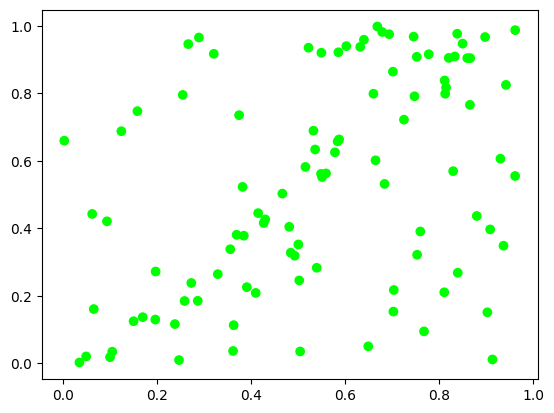

In [16]:
plt.scatter(valid_X[:, 0], valid_X[:, 1], c=[[0, 1-pred_Y[i, 0], pred_Y[i, 0]] for i in range(valid_X.shape[0])])
plt.show()

Érdekesség, hogy kirajzolásnál szépen megjeleníthető a *bizonytalanság*. Minél távolabb van adott $y$ érték $0.5$-től, annál biztosabb a modell a predikcióban. Ennek továbbgondolásaként belátható, hogy minél közelebb van egy kimeneti érték $0.5$-höz, az annál bizonytalanabbnak tekinthető.

Ha a korábban fent definiált színezést ismét megvizsgáljuk, akkor látható, hogy $y$ nyers értékét használva:
- a szín $y = 0$ esetén $[0, 1, 0]$, azaz <span style="color:#0f0">zöld</span>
- a szín $y = 1$ esetén $[0, 0, 1]$, azaz <span style="color:#00f">kék</span>
- a szín $y = 0.5$ esetén $[0, 0.5, 0.5]$, azaz <span style="color:#088">kékes-zöld</span>

Kirajzolva szépen meg is jelenik a határvonal körüli bizonytalanság:

4/4 [==============================] - 0s 2ms/step


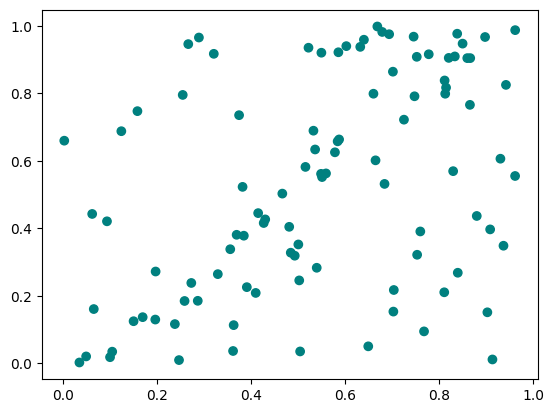

In [17]:
raw_pred_Y = model.predict(valid_X)
plt.scatter(valid_X[:, 0], valid_X[:, 1], c=[[0, 1-raw_pred_Y[i, 0], raw_pred_Y[i, 0]] for i in range(valid_X.shape[0])])
plt.show()

Ha szeretnénk, a modell predikciós képességét tesztelhetjük új adatokkal is. Ehhez persze sokkal szebb lenne egy korábban definiált függvényt újrahasznosítani - én most bemásolom egy fentebbi cella tartalmát.

157/157 [==============================] - 0s 2ms/step


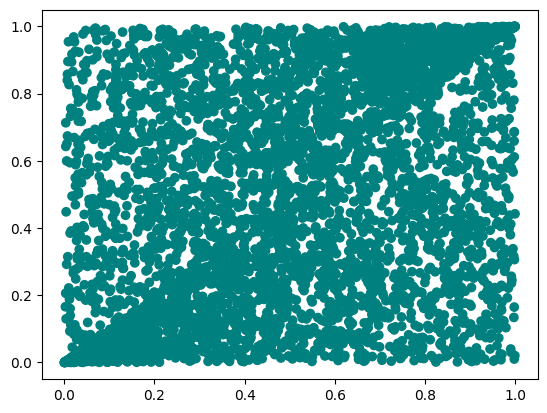

In [18]:
test_X = np.zeros([5000,2])

for i in range(5000):
    if i % 2 == 0:
        val = random.uniform(0, 1.0)
        test_X[i, :] = [val, random.uniform(val, 1.0)]
    else:
        val = random.uniform(0, 1.0)
        test_X[i, :] = [val, random.uniform(0.0, val)]

raw_pred_test_Y = model.predict(test_X)
plt.scatter(test_X[:, 0], test_X[:, 1], 
            c=[[0, 1-raw_pred_test_Y[i, 0], raw_pred_test_Y[i, 0]] for i in range(test_X.shape[0])])
plt.show()